In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from scipy.interpolate import interp1d
import numpy as np
import math


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
uk_plants = pd.read_csv("/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/raw/power_plants/uk_power_plants/power_plants_2018.csv")
uk_plants

,Company,Name,Fuel,Capacity,Start_date,Location
0,AES,Ballylumford B,Gas,540.0,1968,Northern Ireland
1,AES,Ballylumford B OCGT,Gas oil,116.0,1968,Northern Ireland
2,AES,Ballylumford C,CCGT,616.0,2003,Northern Ireland
3,AES,Kilroot OCGT,Gas oil,142.0,1981,Northern Ireland
4,AES,Kilroot,Coal/oil,560.0,1981,Northern Ireland
5,Anesco,Abergelli,Solar,7.7,2015,Wales
6,Anesco,Anglesey,Solar,14.9,2014,Wales
7,Anesco,Ashton,Solar,4.8,2017,South West
8,Anesco,Askern,Solar,5.0,2015,Yorkshire and Humber
9,Anesco,Beeches,Solar,5.0,2016,West Midlands


In [3]:
pp_dat = pd.read_csv("/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/interim/power_plants/power_plant_costs/modern_power_plant_costs/plant_cost_data_nan.csv", na_values="")
pp_dat = pp_dat.rename(columns = {"Unnamed: 0":"Plant_Type"})

pp_dat

,Plant_Type,Plant_Size,Average_Load_Factor,Efficiency,Operating_Period,Constr_1,Constr_2,Constr_3,Constr_4,Constr_5,Constr_6,Constr_7,Constr_8,Constr_Dur,Pre_1,Pre_2,Pre_3,Pre_4,Pre_5,Pre_6,Pre_7,Pre_8,Pre_Dur,Connect_system_cost-Medium _2018,Connect_system_cost-Medium _2020,Connect_system_cost-Medium _2025,Constr_cost-High _2018,Constr_cost-High _2020,Constr_cost-High _2025,Constr_cost-Low _2018,Constr_cost-Low _2020,Constr_cost-Low _2025,Constr_cost-Medium _2018,Constr_cost-Medium _2020,Constr_cost-Medium _2025,Fixed_cost-Medium _2018,Fixed_cost-Medium _2020,Fixed_cost-Medium _2025,Infra_cost-High _2018,Infra_cost-High _2020,Infra_cost-High _2025,Infra_cost-Low _2018,Infra_cost-Low _2020,Infra_cost-Low _2025,Infra_cost-Medium _2018,Infra_cost-Medium _2020,Infra_cost-Medium _2025,Insurance_cost-Medium _2018,Insurance_cost-Medium _2020,Insurance_cost-Medium _2025,Pre_dev_cost-High _2018,Pre_dev_cost-High _2020,Pre_dev_cost-High _2025,Pre_dev_cost-Low _2018,Pre_dev_cost-Low _2020,Pre_dev_cost-Low _2025,Pre_dev_cost-Medium _2018,Pre_dev_cost-Medium _2020,Pre_dev_cost-Medium _2025,Var_cost-Medium _2018,Var_cost-Medium _2020,Var_cost-Medium _2025
0,Coal - CCS IGCC retro FOAK,622.000,0.88,0.27,25.000000,0.250,0.250,0.250,0.250,NaN,NaN,NaN,NaN,4,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,NaN,NaN,3800.0,NaN,NaN,5400.0,NaN,NaN,3600.0,NaN,NaN,4200.0,NaN,NaN,81900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27600.0,NaN,NaN,100.0,NaN,NaN,60.0,NaN,NaN,60.0,NaN,NaN,6.0
1,Coal - CCS ASC Oxy FOAK,552.000,0.91,0.32,25.000000,0.182,0.182,0.182,0.182,0.182,0.091,NaN,NaN,6,0.167,0.167,0.167,0.167,0.167,0.167,NaN,NaN,6,NaN,NaN,3800.0,NaN,NaN,4400.0,NaN,NaN,2900.0,NaN,NaN,3400.0,NaN,NaN,68200.0,NaN,NaN,15000.0,NaN,NaN,5000.0,NaN,NaN,10000.0,NaN,NaN,13000.0,NaN,NaN,80.0,NaN,NaN,30.0,NaN,NaN,40.0,NaN,NaN,6.0
2,Coal - CCS ASC NH3 FOAK,624.000,0.91,0.32,25.000000,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,NaN,NaN,3800.0,NaN,NaN,5500.0,NaN,NaN,3400.0,NaN,NaN,4200.0,NaN,NaN,79600.0,NaN,NaN,15000.0,NaN,NaN,5000.0,NaN,NaN,10000.0,NaN,NaN,19300.0,NaN,NaN,110.0,NaN,NaN,60.0,NaN,NaN,70.0,NaN,NaN,3.0
3,Coal - CCS IGCC FOAK,652.000,0.88,0.30,25.000000,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,NaN,NaN,3800.0,NaN,NaN,5000.0,NaN,NaN,3300.0,NaN,NaN,3900.0,NaN,NaN,65300.0,NaN,NaN,15000.0,NaN,NaN,5000.0,NaN,NaN,10000.0,NaN,NaN,22700.0,NaN,NaN,80.0,NaN,NaN,50.0,NaN,NaN,60.0,NaN,NaN,5.0
4,Coal - CCS IGCC partial FOAK,760.000,0.88,0.35,25.000000,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,NaN,NaN,3800.0,NaN,NaN,3600.0,NaN,NaN,2400.0,NaN,NaN,2800.0,NaN,NaN,52100.0,NaN,NaN,15000.0,NaN,NaN,5000.0,NaN,NaN,10000.0,NaN,NaN,14000.0,NaN,NaN,60.0,NaN,NaN,40.0,NaN,NaN,40.0,NaN,NaN,5.0
5,PV 1-5MW building,1.000,0.11,0.00,25.000000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1300.0,1300.0,1200.0,800.0,800.0,700.0,700.0,600.0,600.0,700.0,700.0,600.0,6600.0,6300.0,5900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2600.0,2600.0,2400.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,3.0,3.0,3.0
6,EfW,30.000,0.81,0.28,35.000000,0.333,0.333,0.333,NaN,NaN,NaN,NaN,NaN,3,0.228,0.228,0.228,0.228,0.090,NaN,NaN,NaN,4,16700.0,16500.0,16100.0,12500.0,12400.0,12200.0,4600.0,4600.0,4500.0,8200.0,8100.0,8000.0,139500.0,137900.0,134800.0,6600.0,6600.0,6600.0,2500.0,2500.0,2500.0,4600.0,4600.0,4600.0,30500.0,30100.0,29500.0,390.0,390.0,390.0,110.0,110.0,110.0,230.0,230.0,230.0,25.0,25.0,24.0
7,EfW CHP,24.000,0.81,0.22,35.000000,0.333,0.333,0.333,NaN,NaN,NaN,NaN,NaN,3,0.228,0.228,0.228,0.228,0.090,NaN,NaN,NaN,4,16700.0,16500.0,16100.0,15900.0,15800.0,15600.0,10300.0,10300.0,10100.0,13300.0,13200.0,13000.0,153000.0,151300.0,147900.0,8500.0,8500.0,8500.0,3000.0,3000.0,3000.0,5900.0,5900.0,5900.0,85200.0,84300.0,82400.0,300.0,300.0,300.0,130.0,130.0,130.0,210.0,210.0,210.0,55.0,55.0,53.0
8,AD,2.000,0.79,0.40,20.000000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,Na

# Converting kW to MW units for simulation simplicity

In [4]:
# pp_dat.filter(like='Pre_dev') = pp_dat.filter(like='Pre_dev')*1000

pp_dat.loc[:, pp_dat.columns.str.startswith('Pre_dev')] = pp_dat.loc[:, pp_dat.columns.str.startswith('Pre_dev')]*1000
pp_dat.loc[:, pp_dat.columns.str.startswith('Constr_cost')] = pp_dat.loc[:, pp_dat.columns.str.startswith('Constr_cost')]*1000
pp_dat[pp_dat['Plant_Type'].str.contains('CCGT H Class')]

,Plant_Type,Plant_Size,Average_Load_Factor,Efficiency,Operating_Period,Constr_1,Constr_2,Constr_3,Constr_4,Constr_5,Constr_6,Constr_7,Constr_8,Constr_Dur,Pre_1,Pre_2,Pre_3,Pre_4,Pre_5,Pre_6,Pre_7,Pre_8,Pre_Dur,Connect_system_cost-Medium _2018,Connect_system_cost-Medium _2020,Connect_system_cost-Medium _2025,Constr_cost-High _2018,Constr_cost-High _2020,Constr_cost-High _2025,Constr_cost-Low _2018,Constr_cost-Low _2020,Constr_cost-Low _2025,Constr_cost-Medium _2018,Constr_cost-Medium _2020,Constr_cost-Medium _2025,Fixed_cost-Medium _2018,Fixed_cost-Medium _2020,Fixed_cost-Medium _2025,Infra_cost-High _2018,Infra_cost-High _2020,Infra_cost-High _2025,Infra_cost-Low _2018,Infra_cost-Low _2020,Infra_cost-Low _2025,Infra_cost-Medium _2018,Infra_cost-Medium _2020,Infra_cost-Medium _2025,Insurance_cost-Medium _2018,Insurance_cost-Medium _2020,Insurance_cost-Medium _2025,Pre_dev_cost-High _2018,Pre_dev_cost-High _2020,Pre_dev_cost-High _2025,Pre_dev_cost-Low _2018,Pre_dev_cost-Low _2020,Pre_dev_cost-Low _2025,Pre_dev_cost-Medium _2018,Pre_dev_cost-Medium _2020,Pre_dev_cost-Medium _2025,Var_cost-Medium _2018,Var_cost-Medium _2020,Var_cost-Medium _2025
35,CCGT H Class,1200.0,0.93,0.54,25.0,0.4,0.4,0.2,NaN,NaN,NaN,NaN,NaN,3,0.44,0.44,0.12,NaN,NaN,NaN,NaN,NaN,2,3300.0,3300.0,3300.0,600000.0,600000.0,600000.0,400000.0,400000.0,400000.0,500000.0,500000.0,500000.0,12200.0,12200.0,12200.0,30200.0,30200.0,30200.0,7600.0,7600.0,7600.0,15100.0,15100.0,15100.0,2100.0,2100.0,2100.0,20000.0,20000.0,20000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,3.0,3.0,3.0


In [5]:
# print(pp_dat.iloc[0,:].loc["Constr_1":"Constr_8"])
# sum(pp_dat.iloc[0,:].loc["Constr_1":"Constr_8"].isna())

def find_wrong_development_periods(dataframe):
    total_nas = sum(dataframe.loc["Pre_1":"Pre_8"].isna())
    if(8-total_nas!=dataframe.loc['Pre_Dur']):
        dataframe.loc['Pre_Dur'] = (8-total_nas)
        print(dataframe.loc['Plant_Type'])
    return dataframe
    
        
#     print(dataframe)

pp_dat_fixed_periods = pp_dat.apply(lambda row: find_wrong_development_periods(row), axis=1)
pp_dat_fixed_periods

EfW 
EfW CHP 
Hydro Large Store 
Tidal stream 
CCGT H Class 
CCGT F Class 
CCGT CHP mode 


,Plant_Type,Plant_Size,Average_Load_Factor,Efficiency,Operating_Period,Constr_1,Constr_2,Constr_3,Constr_4,Constr_5,Constr_6,Constr_7,Constr_8,Constr_Dur,Pre_1,Pre_2,Pre_3,Pre_4,Pre_5,Pre_6,Pre_7,Pre_8,Pre_Dur,Connect_system_cost-Medium _2018,Connect_system_cost-Medium _2020,Connect_system_cost-Medium _2025,Constr_cost-High _2018,Constr_cost-High _2020,Constr_cost-High _2025,Constr_cost-Low _2018,Constr_cost-Low _2020,Constr_cost-Low _2025,Constr_cost-Medium _2018,Constr_cost-Medium _2020,Constr_cost-Medium _2025,Fixed_cost-Medium _2018,Fixed_cost-Medium _2020,Fixed_cost-Medium _2025,Infra_cost-High _2018,Infra_cost-High _2020,Infra_cost-High _2025,Infra_cost-Low _2018,Infra_cost-Low _2020,Infra_cost-Low _2025,Infra_cost-Medium _2018,Infra_cost-Medium _2020,Infra_cost-Medium _2025,Insurance_cost-Medium _2018,Insurance_cost-Medium _2020,Insurance_cost-Medium _2025,Pre_dev_cost-High _2018,Pre_dev_cost-High _2020,Pre_dev_cost-High _2025,Pre_dev_cost-Low _2018,Pre_dev_cost-Low _2020,Pre_dev_cost-Low _2025,Pre_dev_cost-Medium _2018,Pre_dev_cost-Medium _2020,Pre_dev_cost-Medium _2025,Var_cost-Medium _2018,Var_cost-Medium _2020,Var_cost-Medium _2025
0,Coal - CCS IGCC retro FOAK,622.000,0.88,0.27,25.000000,0.250,0.250,0.250,0.250,NaN,NaN,NaN,NaN,4,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,NaN,NaN,3800.0,NaN,NaN,5400000.0,NaN,NaN,3600000.0,NaN,NaN,4200000.0,NaN,NaN,81900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27600.0,NaN,NaN,100000.0,NaN,NaN,60000.0,NaN,NaN,60000.0,NaN,NaN,6.0
1,Coal - CCS ASC Oxy FOAK,552.000,0.91,0.32,25.000000,0.182,0.182,0.182,0.182,0.182,0.091,NaN,NaN,6,0.167,0.167,0.167,0.167,0.167,0.167,NaN,NaN,6,NaN,NaN,3800.0,NaN,NaN,4400000.0,NaN,NaN,2900000.0,NaN,NaN,3400000.0,NaN,NaN,68200.0,NaN,NaN,15000.0,NaN,NaN,5000.0,NaN,NaN,10000.0,NaN,NaN,13000.0,NaN,NaN,80000.0,NaN,NaN,30000.0,NaN,NaN,40000.0,NaN,NaN,6.0
2,Coal - CCS ASC NH3 FOAK,624.000,0.91,0.32,25.000000,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,NaN,NaN,3800.0,NaN,NaN,5500000.0,NaN,NaN,3400000.0,NaN,NaN,4200000.0,NaN,NaN,79600.0,NaN,NaN,15000.0,NaN,NaN,5000.0,NaN,NaN,10000.0,NaN,NaN,19300.0,NaN,NaN,110000.0,NaN,NaN,60000.0,NaN,NaN,70000.0,NaN,NaN,3.0
3,Coal - CCS IGCC FOAK,652.000,0.88,0.30,25.000000,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,NaN,NaN,3800.0,NaN,NaN,5000000.0,NaN,NaN,3300000.0,NaN,NaN,3900000.0,NaN,NaN,65300.0,NaN,NaN,15000.0,NaN,NaN,5000.0,NaN,NaN,10000.0,NaN,NaN,22700.0,NaN,NaN,80000.0,NaN,NaN,50000.0,NaN,NaN,60000.0,NaN,NaN,5.0
4,Coal - CCS IGCC partial FOAK,760.000,0.88,0.35,25.000000,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,NaN,NaN,3800.0,NaN,NaN,3600000.0,NaN,NaN,2400000.0,NaN,NaN,2800000.0,NaN,NaN,52100.0,NaN,NaN,15000.0,NaN,NaN,5000.0,NaN,NaN,10000.0,NaN,NaN,14000.0,NaN,NaN,60000.0,NaN,NaN,40000.0,NaN,NaN,40000.0,NaN,NaN,5.0
5,PV 1-5MW building,1.000,0.11,0.00,25.000000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1300.0,1300.0,1200.0,800000.0,800000.0,700000.0,700000.0,600000.0,600000.0,700000.0,700000.0,600000.0,6600.0,6300.0,5900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2600.0,2600.0,2400.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,3.0,3.0,3.0
6,EfW,30.000,0.81,0.28,35.000000,0.333,0.333,0.333,NaN,NaN,NaN,NaN,NaN,3,0.228,0.228,0.228,0.228,0.090,NaN,NaN,NaN,5,16700.0,16500.0,16100.0,12500000.0,12400000.0,12200000.0,4600000.0,4600000.0,4500000.0,8200000.0,8100000.0,8000000.0,139500.0,137900.0,134800.0,6600.0,6600.0,6600.0,2500.0,2500.0,2500.0,4600.0,4600.0,4600.0,30500.0,30100.0,29500.0,390000.0,390000.0,390000.0,110000.0,110000.0,110000.0,230000.0,230000.0,230000.0,25.0,25.0,24.0
7,EfW CHP,24.000,0.81,0.22,35.000000,0.333,0.333,0.333,NaN,NaN,NaN,NaN,NaN,3,0.228,0.228,0.228,0.228,0.090,NaN,NaN,NaN,5,16700.0,16500.0,16100.0,15900000.0,15800000.0,15600000.0,10300000.0,10300000.0,10100000.0,13300000.0,13200000.0,13000000.0,153000.0,151300.0,147

In [6]:
# split_by_plant = pp_dat['Plant_Type'].transform(lambda x: "CCGT" if x.str.contains('CCGT') else x)
pp_dat_fixed_periods['Type'] = pp_dat_fixed_periods['Plant_Type'].map(
            lambda x: #"Coal_CCS" if all(check in x for check in ["Coal", "CCS"])
            "Coal" if "Coal" in x
            else "PV" if "PV" in x else "EfW" if "EfW" in x
            else "AD" if "AD" in x else "ACT" if "ACT" in x 
            else "Offshore" if "Offshore" in x
            else "Biomass" if "Biomass" in x 
            else "Conversions" if "Conversions" in x
            else "Onshore" if "Onshore" in x 
            else "Landfill" if "Landfill" in x
            else "Sewage" if "Sewage" in x 
            else "Geothermal" if "Geothermal" in x
            else "Hydro_Store" if all(check in x for check in ['Hydro', 'Store'])
            else "Hydro" if "Hydro" in x
            else "Wave" if "Wave" in x 
            else "Tidal" if "Tidal" in x
            else "OCGT" if all(check in x for check in ["OCGT", "2000"])
#             else "OCGT_500hr" if all(check in x for check in ["OCGT", "500"])
            else "CCGT_CCS" if all(check in x for check in ["CCGT", "CCS"])
            else "CCGT" if "CCGT" in x
            else "OCGT_CCS" if all(check in x for check in ["OCGT", "CCS"])
            else "OCGT" if "OCGT" in x
            else "Recip_gas" if "Recip Gas" in x else "Recip_gas" if "RECIP GAS" in x else "Nuclear" if "Nuclear" in x
            else "Pumped_storage" if "Pumped" in x
            else "PV" if "Solar" in x else "Recip_diesel" if "Recip Diesel" in x
            else "")

# print(pp_dat[pp_dat['Type'].str.contains("hr")].sort_values('Plant_Size'))



In [7]:
pp_dat_fixed_periods.loc[pp_dat_fixed_periods.Type=="Hydro"]

,Plant_Type,Plant_Size,Average_Load_Factor,Efficiency,Operating_Period,Constr_1,Constr_2,Constr_3,Constr_4,Constr_5,Constr_6,Constr_7,Constr_8,Constr_Dur,Pre_1,Pre_2,Pre_3,Pre_4,Pre_5,Pre_6,Pre_7,Pre_8,Pre_Dur,Connect_system_cost-Medium _2018,Connect_system_cost-Medium _2020,Connect_system_cost-Medium _2025,Constr_cost-High _2018,Constr_cost-High _2020,Constr_cost-High _2025,Constr_cost-Low _2018,Constr_cost-Low _2020,Constr_cost-Low _2025,Constr_cost-Medium _2018,Constr_cost-Medium _2020,Constr_cost-Medium _2025,Fixed_cost-Medium _2018,Fixed_cost-Medium _2020,Fixed_cost-Medium _2025,Infra_cost-High _2018,Infra_cost-High _2020,Infra_cost-High _2025,Infra_cost-Low _2018,Infra_cost-Low _2020,Infra_cost-Low _2025,Infra_cost-Medium _2018,Infra_cost-Medium _2020,Infra_cost-Medium _2025,Insurance_cost-Medium _2018,Insurance_cost-Medium _2020,Insurance_cost-Medium _2025,Pre_dev_cost-High _2018,Pre_dev_cost-High _2020,Pre_dev_cost-High _2025,Pre_dev_cost-Low _2018,Pre_dev_cost-Low _2020,Pre_dev_cost-Low _2025,Pre_dev_cost-Medium _2018,Pre_dev_cost-Medium _2020,Pre_dev_cost-Medium _2025,Var_cost-Medium _2018,Var_cost-Medium _2020,Var_cost-Medium _2025,Type
25,Hydro 5-16MW,11.000,0.35,1.0,41.0,0.7,0.3,NaN,NaN,NaN,NaN,NaN,NaN,2,0.77,0.23,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,3100000.0,3100000.0,3100000.0,1600000.0,1600000.0,1600000.0,3000000.0,3000000.0,3000000.0,45100.0,45100.0,45100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300000.0,300000.0,300000.0,40000.0,40000.0,40000.0,60000.0,60000.0,60000.0,6.0,6.0,6.0,Hydro
29,Hydropower <100kW,0.033,0.60,1.0,35.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,7800000.0,7800000.0,7800000.0,4800000.0,4800000.0,4800000.0,6300000.0,6300000.0,6300000.0,83300.0,83300.0,83300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hydro
30,Hydropower 500-2000kW,1.046,0.40,1.0,35.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,4100000.0,4100000.0,4100000.0,2500000.0,2500000.0,2500000.0,3300000.0,3300000.0,3300000.0,18200.0,18200.0,18200.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hydro


In [8]:
pp_dat_fixed_periods[pp_dat_fixed_periods.Type=="Hydro"]

,Plant_Type,Plant_Size,Average_Load_Factor,Efficiency,Operating_Period,Constr_1,Constr_2,Constr_3,Constr_4,Constr_5,Constr_6,Constr_7,Constr_8,Constr_Dur,Pre_1,Pre_2,Pre_3,Pre_4,Pre_5,Pre_6,Pre_7,Pre_8,Pre_Dur,Connect_system_cost-Medium _2018,Connect_system_cost-Medium _2020,Connect_system_cost-Medium _2025,Constr_cost-High _2018,Constr_cost-High _2020,Constr_cost-High _2025,Constr_cost-Low _2018,Constr_cost-Low _2020,Constr_cost-Low _2025,Constr_cost-Medium _2018,Constr_cost-Medium _2020,Constr_cost-Medium _2025,Fixed_cost-Medium _2018,Fixed_cost-Medium _2020,Fixed_cost-Medium _2025,Infra_cost-High _2018,Infra_cost-High _2020,Infra_cost-High _2025,Infra_cost-Low _2018,Infra_cost-Low _2020,Infra_cost-Low _2025,Infra_cost-Medium _2018,Infra_cost-Medium _2020,Infra_cost-Medium _2025,Insurance_cost-Medium _2018,Insurance_cost-Medium _2020,Insurance_cost-Medium _2025,Pre_dev_cost-High _2018,Pre_dev_cost-High _2020,Pre_dev_cost-High _2025,Pre_dev_cost-Low _2018,Pre_dev_cost-Low _2020,Pre_dev_cost-Low _2025,Pre_dev_cost-Medium _2018,Pre_dev_cost-Medium _2020,Pre_dev_cost-Medium _2025,Var_cost-Medium _2018,Var_cost-Medium _2020,Var_cost-Medium _2025,Type
25,Hydro 5-16MW,11.000,0.35,1.0,41.0,0.7,0.3,NaN,NaN,NaN,NaN,NaN,NaN,2,0.77,0.23,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,3100000.0,3100000.0,3100000.0,1600000.0,1600000.0,1600000.0,3000000.0,3000000.0,3000000.0,45100.0,45100.0,45100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300000.0,300000.0,300000.0,40000.0,40000.0,40000.0,60000.0,60000.0,60000.0,6.0,6.0,6.0,Hydro
29,Hydropower <100kW,0.033,0.60,1.0,35.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,7800000.0,7800000.0,7800000.0,4800000.0,4800000.0,4800000.0,6300000.0,6300000.0,6300000.0,83300.0,83300.0,83300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hydro
30,Hydropower 500-2000kW,1.046,0.40,1.0,35.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,4100000.0,4100000.0,4100000.0,2500000.0,2500000.0,2500000.0,3300000.0,3300000.0,3300000.0,18200.0,18200.0,18200.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hydro


## Remove NaN's where there should be 0s. 

In [10]:
def fill_relevant_na(row):
    for year in ['2018', '2020', '2025']:
        if all(row.filter(like=year).isnull()):
            continue
        else:
            columns = row.filter(like=year).axes[0].tolist()
            row[columns] = row[columns].fillna(0)
    return row
        
pp_dat_fixed_periods1 = pp_dat_fixed_periods.copy()

pp_dat_fixed_periods1 = pp_dat_fixed_periods1.apply(lambda x: fill_relevant_na(x), axis=1)

In [14]:
pp_dat_fixed_periods1.to_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/processed/power_plants/power_plant_costs/modern_power_plant_costs/power_plant_costs_with_simplified_type.csv')






In [22]:
pp_dat[pp_dat.Plant_Type=='Coal'].filter(regex='2018').isnull().all(1)

for name, row in pp_dat.iterrows():
    if not (row.filter(regex='2018').isnull().all() or row.filter(regex='2025').isnull().all()) and row[['Var_cost-Medium _2018','Infra_cost-High _2018','Insurance_cost-Medium _2018','Connect_system_cost-Medium _2018','Pre_dev_cost-High _2018']].isnull().any():

        cols_to_change = row.filter(regex='^((?!Constr).)*$').filter(regex='^((?!Pre).)*$').filter(regex='^((?!Plant_Type).)*$').filter(regex='^((?!Plant_Size).)*$').filter(regex='^((?!Average_Load).)*$').filter(regex='^((?!Efficiency).)*$').filter(regex='^((?!Operating).)*$').axes[0]
        row[cols_to_change] = row[cols_to_change].fillna(0)




In [23]:
pp_dat1 = pp_dat.apply(lambda x: 0 if not (row.filter(regex='2018').isnull().all() or row.filter(regex='2025').isnull().all()) and row[['Var_cost-Medium _2018','Infra_cost-High _2018','Insurance_cost-Medium _2018','Connect_system_cost-Medium _2018','Pre_dev_cost-High _2018']].isnull().any() else x)
print(pp_dat1)






                         Plant_Type  Plant_Size  Average_Load_Factor  \
0       Coal - CCS IGCC retro FOAK      622.000                 0.88   
1          Coal - CCS ASC Oxy FOAK      552.000                 0.91   
2          Coal - CCS ASC NH3 FOAK      624.000                 0.91   
3             Coal - CCS IGCC FOAK      652.000                 0.88   
4     Coal - CCS IGCC partial FOAK      760.000                 0.88   
5                PV 1-5MW building        1.000                 0.11   
6                              EfW       30.000                 0.81   
7                          EfW CHP       24.000                 0.81   
8                               AD        2.000                 0.79   
9                           AD CHP        2.000                 0.79   
10                    ACT Standard       12.000                 0.83   
11                    ACT Advanced        9.000                 0.83   
12                         ACT CHP        1.000                 

In [24]:
pp_dat[pp_dat.Plant_Type=='Coal'].filter(regex='2018')

,Connect_system_cost-Medium _2018,Constr_cost-High _2018,Constr_cost-Low _2018,Constr_cost-Medium _2018,Fixed_cost-Medium _2018,Infra_cost-High _2018,Infra_cost-Low _2018,Infra_cost-Medium _2018,Insurance_cost-Medium _2018,Pre_dev_cost-High _2018,Pre_dev_cost-Low _2018,Pre_dev_cost-Medium _2018,Var_cost-Medium _2018


In [25]:
plot_vals = ['Connect_system_cost-Medium _2018', 'Constr_cost-Medium _2018', 'Fixed_cost-Medium _2018', 
             'Infra_cost-Medium _2018', 'Insurance_cost-Medium _2018', 'Pre_dev_cost-Medium _2018', 
             'Var_cost-Medium _2018']

In [14]:
grouped = pp_dat.groupby('Plant_Type').filter(lambda x: len(x.index)>1).groupby('Plant_Type')
rowlength= grouped.ngroups/2

In [15]:
fig, axs = plt.subplots(nrows=rowlength, ncols=2, figsize=(30,30))

targets = zip(grouped.groups.keys(), axs.flatten())
# print(targets)
for (key, ax) in targets:
    plant_group = grouped.get_group(key).sort_values('Plant_Size',ascending=False)

    for col in plot_vals:
        rem_na = plant_group[['Plant_Size', col]].dropna()
        ax.plot(rem_na['Plant_Size'],rem_na[col], label=col, marker='o')
        ax.set_title(key)
    ax.legend(loc='upper right')
ax.legend()
plt.show()

fig.savefig("plant_cost_data_plots")

TypeError: 'float' object cannot be interpreted as an integer

In [36]:
class predict_point():
    def __init__(self, plant_size, cost_var):
        self.plant_size = plant_size
        self.cost_var = cost_var
        
    def __call__(self, x_new):
        if type(x_new) == list: 
            output = [self.predict(x) for x in x_new]
            return output
        else:
            return self.predict(x_new)

    def predict(self, x_new):
        if(x_new<=min(self.plant_size)):
            return self.cost_var.iloc[0]
        elif(x_new>=max(self.plant_size)):
            return self.cost_var.iloc[-1]
        else:
            interp = interp1d(self.plant_size, self.cost_var)
            return interp(x_new)        

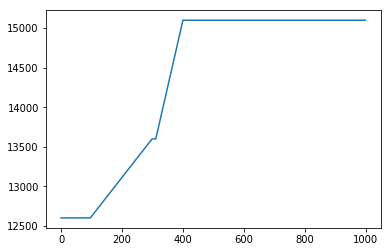

In [37]:
ocgt_2000 = pp_dat[pp_dat['Type'].str.contains("OCGT_2000hr")]

ocgt_2000=ocgt_2000.sort_values('Plant_Size')

test_string = 'Infra_cost-Medium _2018'

prediction = predict_point(ocgt_2000['Plant_Size'], ocgt_2000[test_string])
prediction(20)

x_test = range(1000)
output = prediction(x_test)
plt.plot(x_test, output)
plt.show()





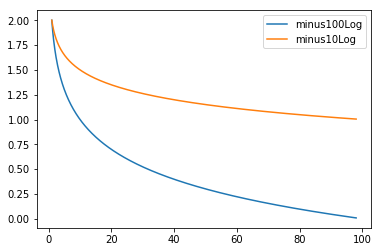

In [38]:
x_test = np.linspace(1,98,1000)

cube_root = x_test ** (1. /3)
# print(cube_root)

quad_root = x_test ** (1. /4)
# print(quad_root)

dec_root = x_test ** (1. /10)

log10 = [math.log(x,40) for x in x_test]

logE = [math.log10(x) for x in x_test]

minus10Log = [-math.log(x,10)+2 for x in x_test]
minus100Log = [-math.log(x,100)+2 for x in x_test]

plt.plot(x_test,minus10Log,label="minus100Log")
plt.plot(x_test,minus100Log,label="minus10Log")
plt.legend()
plt.show()

In [39]:
uk_plants_fuel = uk_plants.groupby('Fuel')
uk_row_length = uk_plants_fuel.ngroups/2

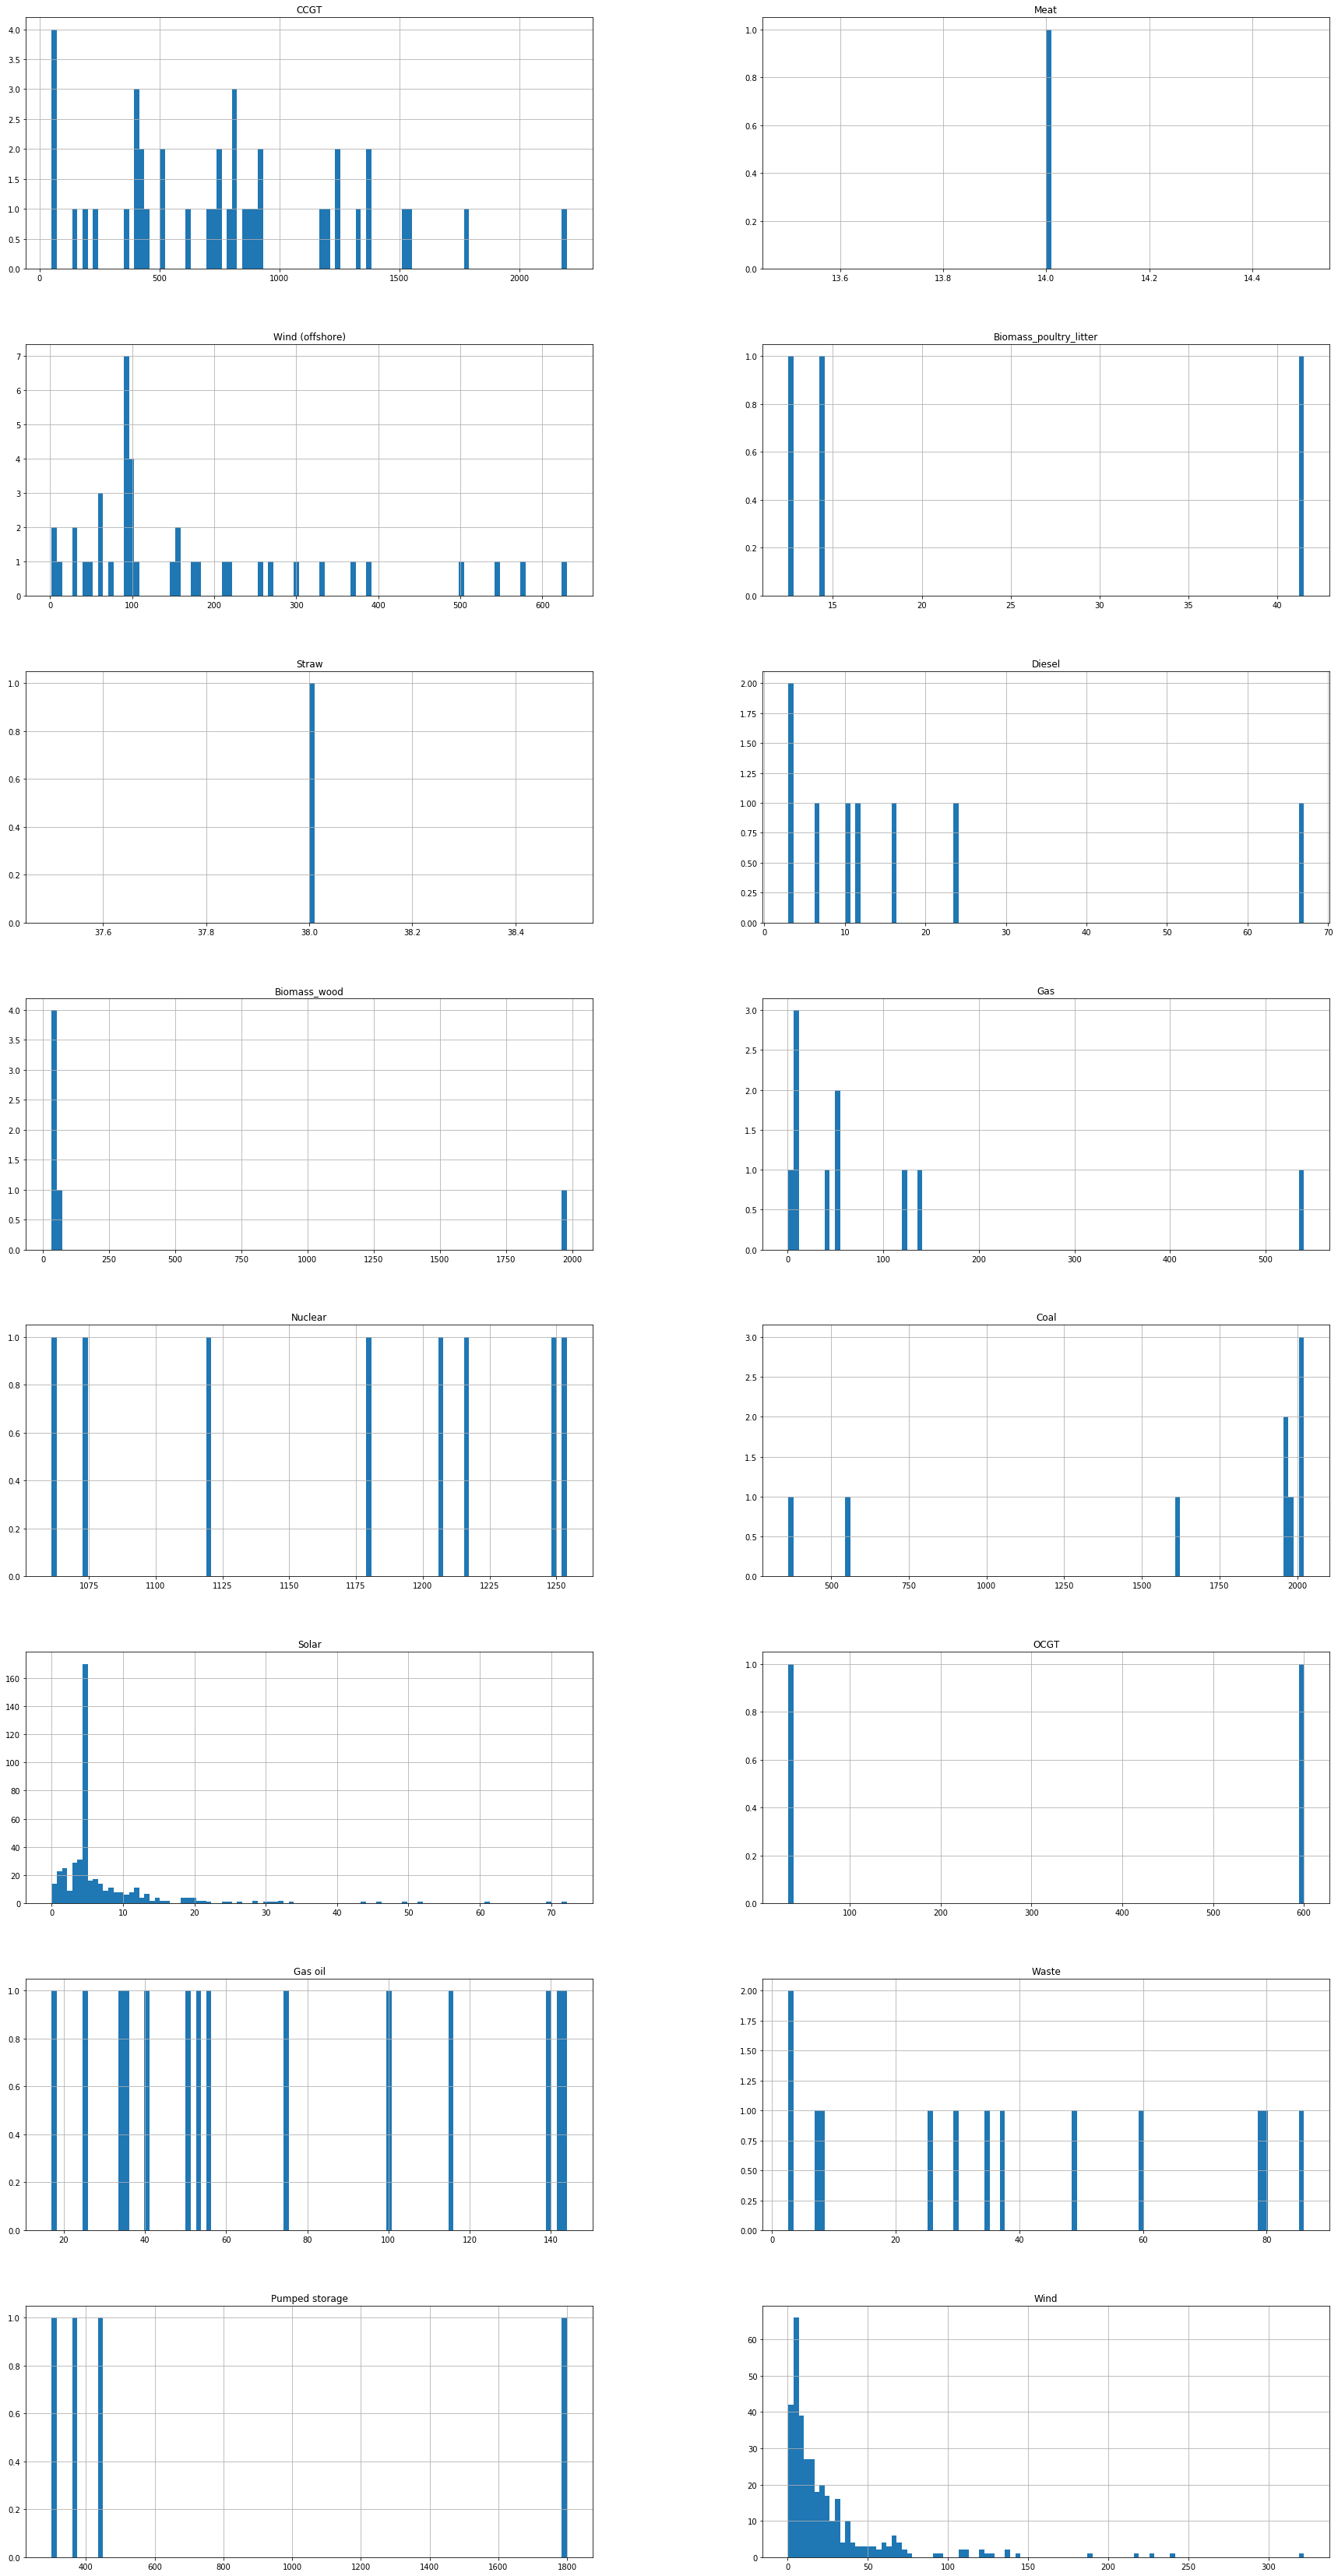

In [40]:
fig1, axes1 = plt.subplots(nrows=uk_row_length, ncols=2, figsize=(30,60))

targets1 = zip(uk_plants_fuel.groups.keys(), axes1.flatten())

for (key1, ax1) in targets1:
    uk_plant_group = uk_plants_fuel.get_group(key1).sort_values('Capacity')
    
    uk_plant_group.hist(ax=ax1, column='Capacity', bins=100)
    ax1.set_title(key1)
    
plt.show()
fig1.savefig('uk_plant_hist')